What I want to say : 


Explain the competition briefly 

Lessons learned : 
- Before things get too complicated, know your data
visualize it to see it there is anything wrong


- If you have budget constraints, start small, but always try to have a representative dataset

What to show : An example of a good progression

In [1]:
from src.config import config
import os
img_dir = os.path.join(config["DATA_DIR"], "3D_val_npz")
gts_dir = os.path.join(config["DATA_DIR"], "3D_val_gt_interactive_seg")
output_dir = os.path.join(config["RESULTS_DIR"], "simple")

dsc_columns = ['DSC_1', 'DSC_2', 'DSC_3', 'DSC_4', 'DSC_5', 'DSC_6']


Loaded configuration for machine: nora


In [2]:
import pandas as pd

evalmetrics_df = pd.read_csv(os.path.join(output_dir, "norateam_metrics_2130_cases.csv")) 
# Extract first two letters from CaseName to create modality column
evalmetrics_df['modality'] = evalmetrics_df['CaseName'].str[:2]
# add a dsc progression ratio that is dsc_5/dsc_1
evalmetrics_df['dsc_progression_ratio'] = evalmetrics_df['DSC_Final'] / evalmetrics_df['DSC_1']
# add a nsd progression ratio that is nsd_5/nsd_1
evalmetrics_df['nsd_progression_ratio'] = evalmetrics_df['NSD_Final'] / evalmetrics_df['NSD_1']
# add a running time progression ratio that is running_time_1 / total_running_time
evalmetrics_df['running_time_iter_1_ratio'] = evalmetrics_df['RunningTime_1'] / evalmetrics_df['TotalRunningTime']



In [3]:
evalmetrics_df[evalmetrics_df['DSC_1'] > 0].nlargest(10, "dsc_progression_ratio")[['CaseName', 'modality', 'DSC_1', 'DSC_Final', 'dsc_progression_ratio', 'NSD_1', 'NSD_Final', 'nsd_progression_ratio', 'RunningTime_1', 'TotalRunningTime', 'running_time_iter_1_ratio']]

,CaseName,modality,DSC_1,DSC_Final,dsc_progression_ratio,NSD_1,NSD_Final,nsd_progression_ratio,RunningTime_1,TotalRunningTime,running_time_iter_1_ratio
1740,MR_WMH_FLAIR_Singapore_85,MR,0.160207,0.784969,4.899708,0.000000,0.953276,inf,5.276325,32.828708,0.160723
1762,MR_WMH_T1_Utrecht_29,MR,0.175423,0.702552,4.004907,0.000000,0.931948,inf,12.785811,74.757668,0.171030
1756,MR_WMH_T1_Singapore_59,MR,0.171026,0.659391,3.855509,0.000000,0.894699,inf,5.607789,32.836485,0.170779
1738,MR_WMH_FLAIR_Singapore_56,MR,0.196632,0.752262,3.825742,0.000000,0.940343,inf,4.510122,26.852658,0.167958
1499,MR_ISLES2022_ADC_sub-strokecase0238,MR,0.188217,0.685031,3.639576,0.000000,0.840549,inf,2.652160,15.324518,0.173066
161,CT_AbdTumor_hepaticvessel_282,CT,0.236205,0.821416,3.477551,0.286793,0.940539,3.279508,1.442298,8.461533,0.170454
1752,MR_WMH_T1_Amsterdam_GE3T_143,MR,0.194066,0.612764,3.157507,0.000000,0.841232,inf,4.832224,27.410494,0.176291
1522,MR_ISLES2022_DWI_sub-strokecase0230,MR,0.246233,0.776544,3.153692,0.134034,0.738032,5.506317,1.059380,6.236085,0.169879
1748,MR_WMH_FLAIR_Utrecht_9,MR,0.248431,0.767802,3.090601,0.328589,0.914602,2.783422,7.690369,45.272745,0.169868
1496,MR_ISLES2022_ADC_sub-strokecase0220,MR,0.248250,0.754395,3.038858,0.265333,0.952061,3.588170,0.999426,6.039214,0.165489


In [4]:
# get the top 10 cases with the highest DSC_1
evalmetrics_df.nlargest(100, "DSC_1")[['CaseName', 'modality', 'DSC_1', 'DSC_Final', 'dsc_progression_ratio', 'NSD_1', 'NSD_Final', 'nsd_progression_ratio', 'RunningTime_1', 'TotalRunningTime', 'running_time_iter_1_ratio']]

,CaseName,modality,DSC_1,DSC_Final,dsc_progression_ratio,NSD_1,NSD_Final,nsd_progression_ratio,RunningTime_1,TotalRunningTime,running_time_iter_1_ratio
474,CT_LungMasks_lung_059,CT,0.977593,0.980432,1.002904,0.957349,0.980925,1.024627,3.141013,19.556281,0.160614
472,CT_LungMasks_lung_048,CT,0.974360,0.977877,1.003610,0.935254,0.962003,1.028601,4.100914,25.629266,0.160009
473,CT_LungMasks_lung_058,CT,0.972446,0.978235,1.005953,0.928426,0.965916,1.040380,3.184479,20.511395,0.155254
468,CT_LungMasks_lung_009,CT,0.970094,0.978963,1.009143,0.923624,0.953828,1.032701,3.415497,21.669306,0.157619
467,CT_LungMasks_lung_005,CT,0.969955,0.976072,1.006307,0.916415,0.949962,1.036607,3.951746,24.685505,0.160084
...,...,...,...,...,...,...,...,...,...,...,...
84,CT_AbdTumor_case_00007,CT,0.926277,0.930419,1.004472,0.993943,0.993770,0.999826,0.535990,3.185696,0.168249
87,CT_AbdTumor_case_00048,CT,0.926091,0.925167,0.999002,0.975543,0.968251,0.992526,0.506404,3.081630,0.164330
1876,Microscopy_SELMA3D_patchvolume_ADplaques_019,Mi,0.925620,0.933333,1.008333,1.000000,1.000000,1.000000,0.495245,3.035918,0.163128
1570,MR_ProstateT2_T2-ProstateX-0113,MR,0.924895,0.939950,1.016277,0.982260,0.994578,1.012541,0.512592,3.485188,0.147077


Text(0, 0.5, 'Frequency')

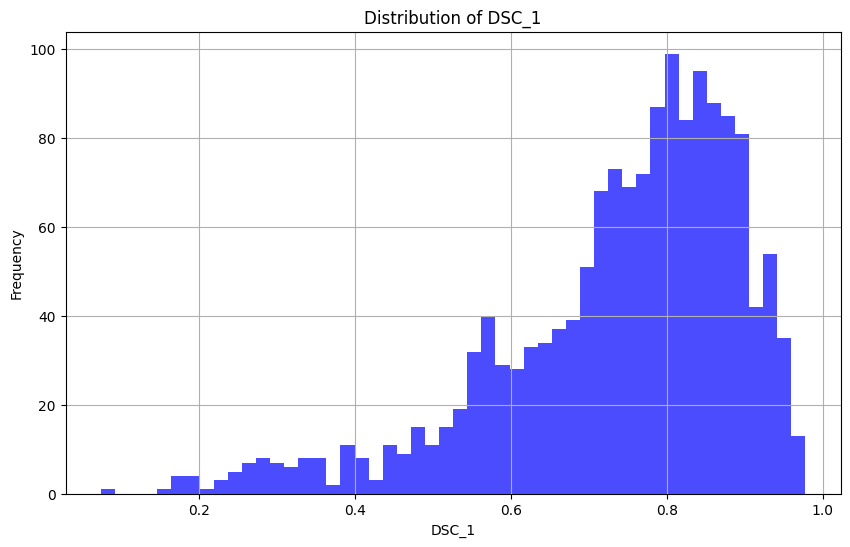

In [5]:
#distribution of DSC_1
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
evalmetrics_df['DSC_1'][evalmetrics_df['DSC_1'] > 0].hist(bins=50, color='blue', alpha=0.7)
plt.title('Distribution of DSC_1')
plt.xlabel('DSC_1')
plt.ylabel('Frequency')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
case: CT_AbdomenAtlas_BDMAP_00007413, dscs: [0.28538935 0.3748758  0.40279272 0.4131165  0.42448429 0.42897655]


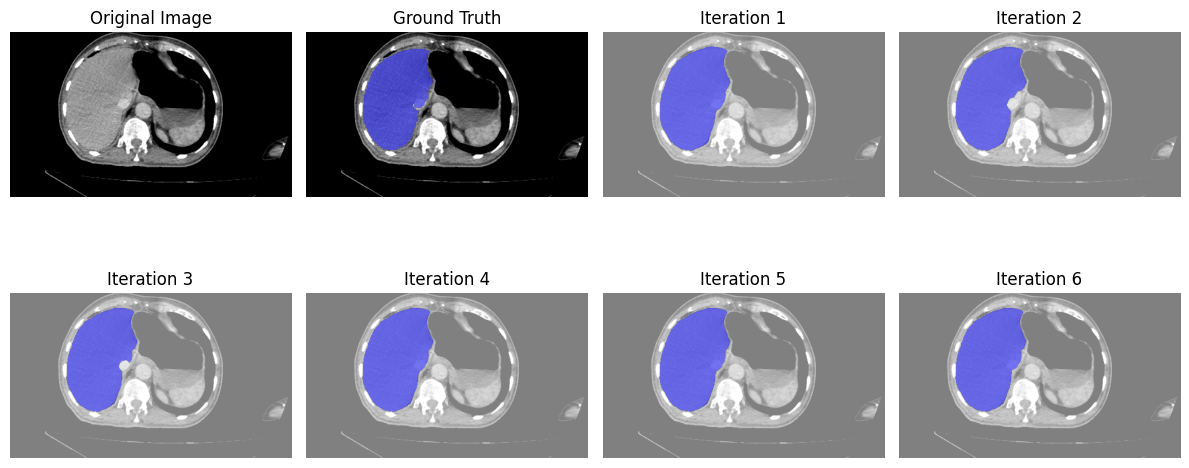

case: MR_WMH_T1_Singapore_87, dscs: [0.32901696 0.61820346 0.64655974 0.67967496 0.69786955 0.70089337]


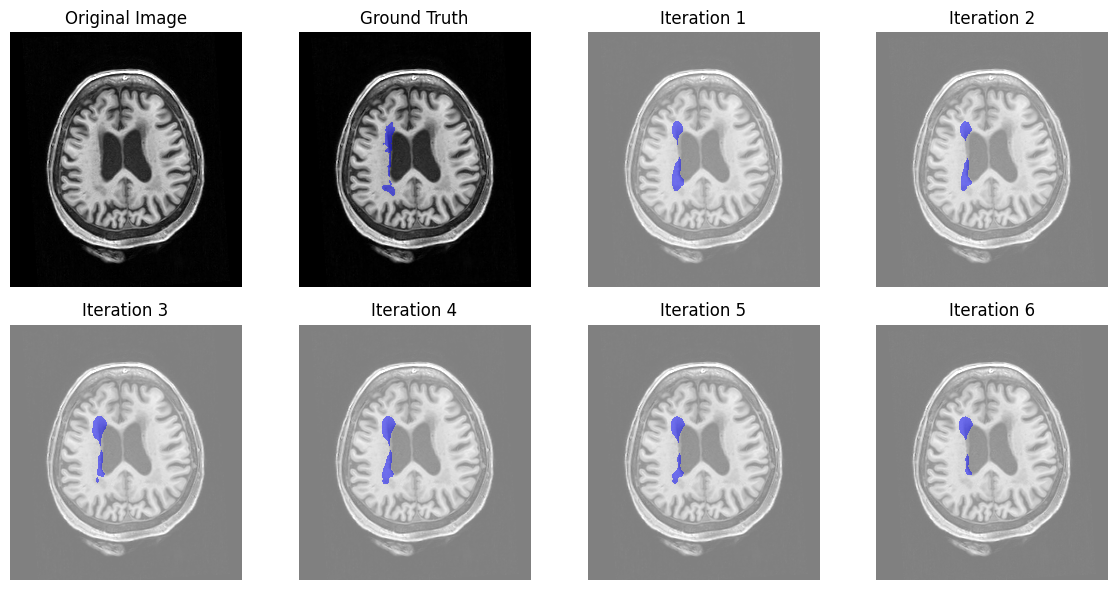

case: MR_WMH_T1_Singapore_59, dscs: [0.1710256  0.51299085 0.55131725 0.60988141 0.64050298 0.65939068]


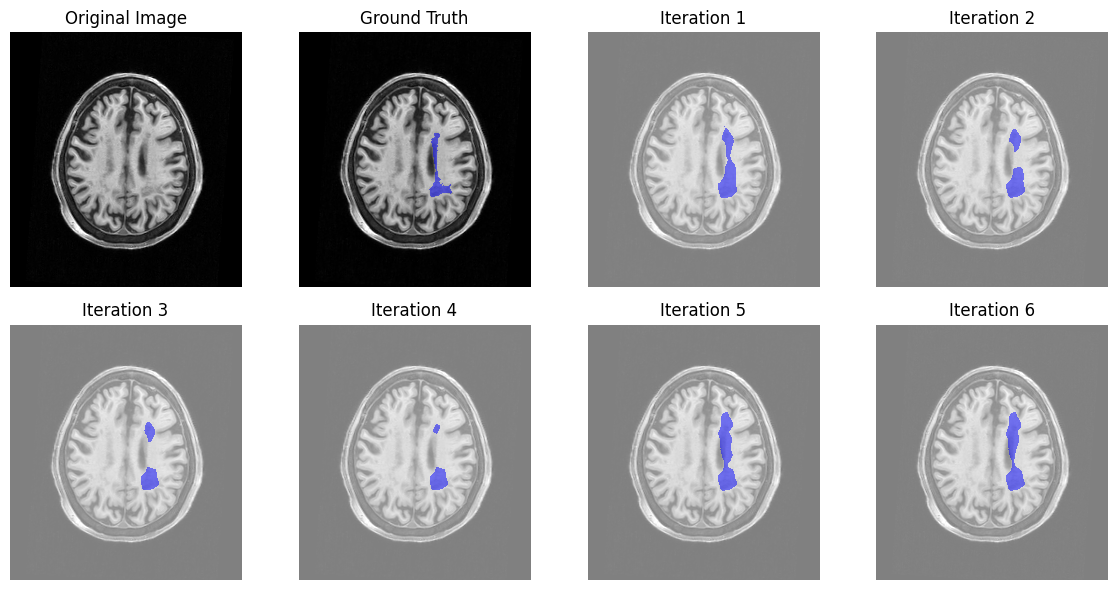

case: MR_totalseg_mr_s0007, dscs: [0.48777945 0.62563849 0.66406633 0.69496382 0.70795215 0.71365921]


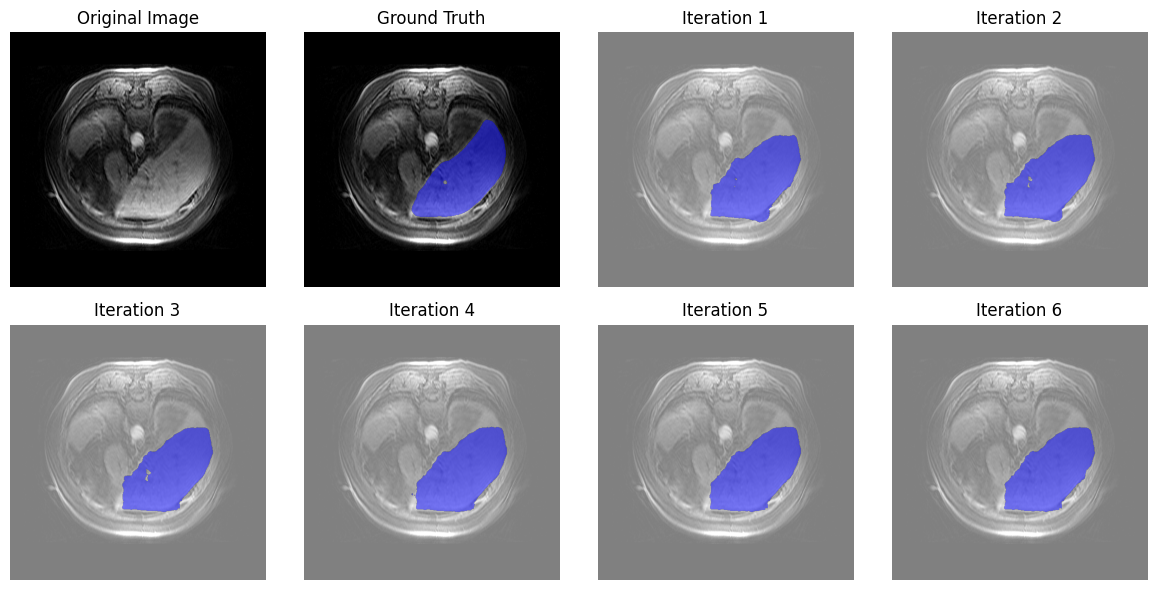

case: MR_WMH_T1_Amsterdam_GE1T5_155, dscs: [0.32236832 0.64828025 0.67366496 0.68518634 0.69567246 0.69833209]


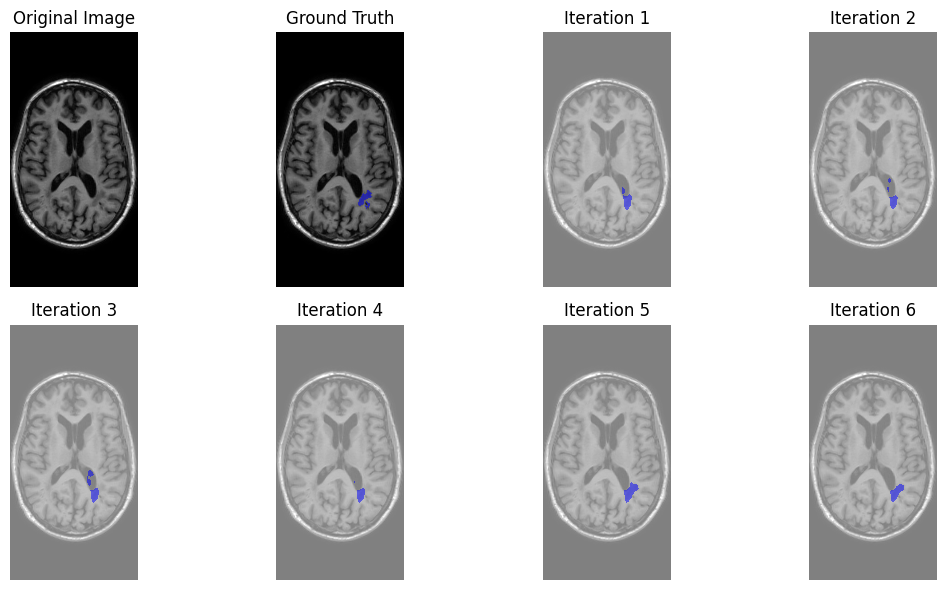

case: CT_AbdTumor_hepaticvessel_441, dscs: [0.23310792 0.60810325 0.63939088 0.65495627 0.66852118 0.68727603]


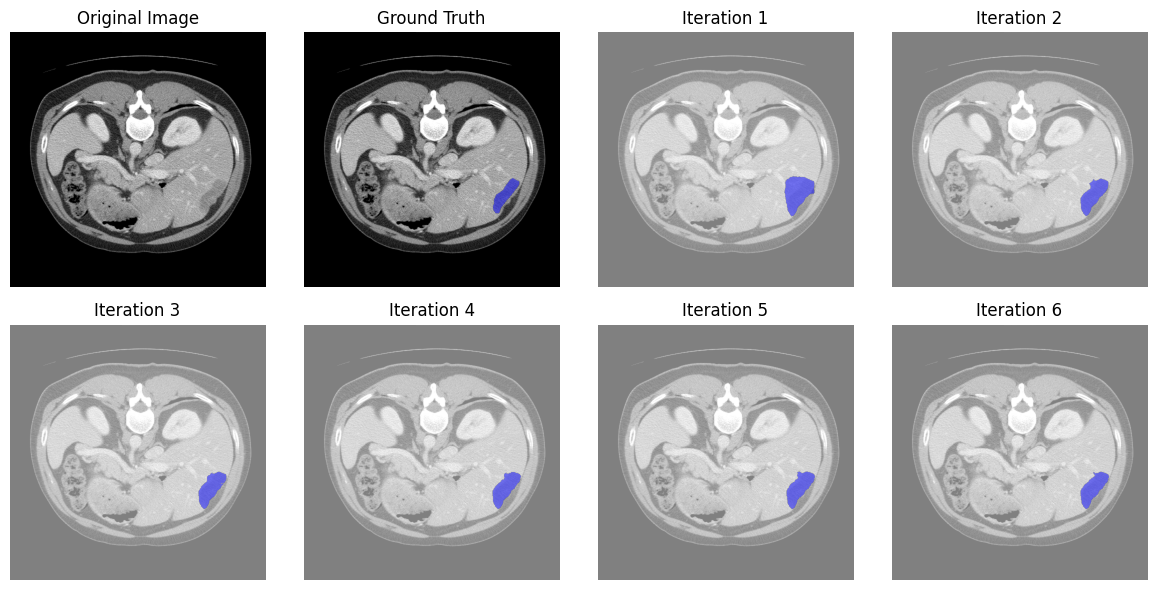

case: PET_autoPET_fdg_9521502dbb_05-17-2007-NA-PET-CT Ganzkoerper  primaer mit KM-42207, dscs: [0.52914795 0.77694866 0.79904896 0.80775476 0.81276503 0.81494612]


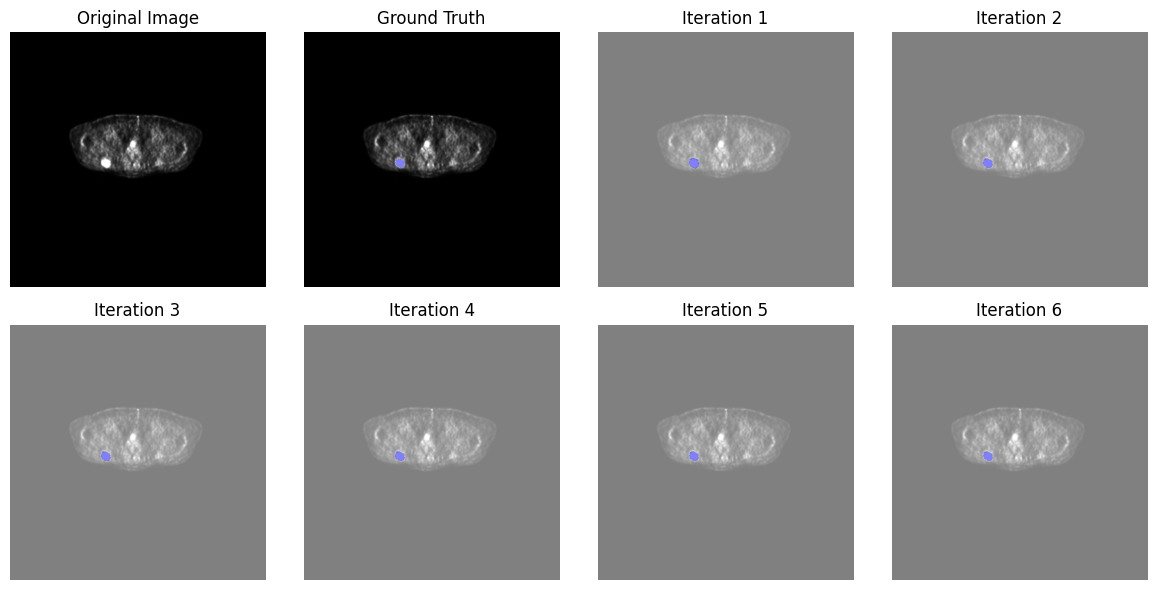

case: US_Low-limb-Leg35, dscs: [0.52951406 0.66204719 0.72410498 0.75156524 0.78052196 0.77057406]


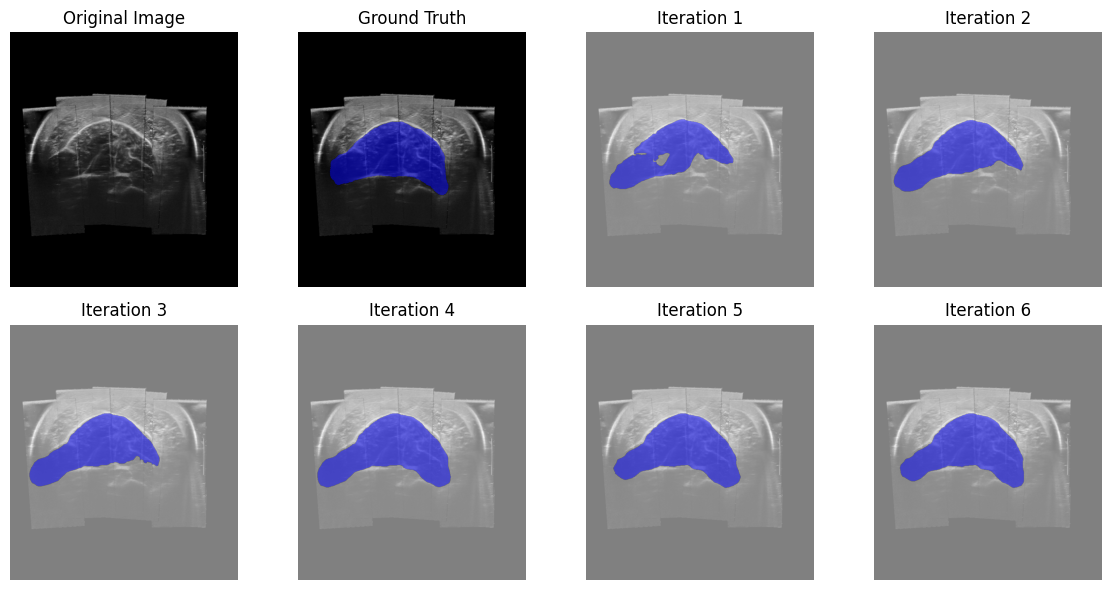

case: MR_ISLES2022_ADC_sub-strokecase0230, dscs: [0.25489467 0.6359644  0.71008551 0.71720756 0.73622314 0.73698948]


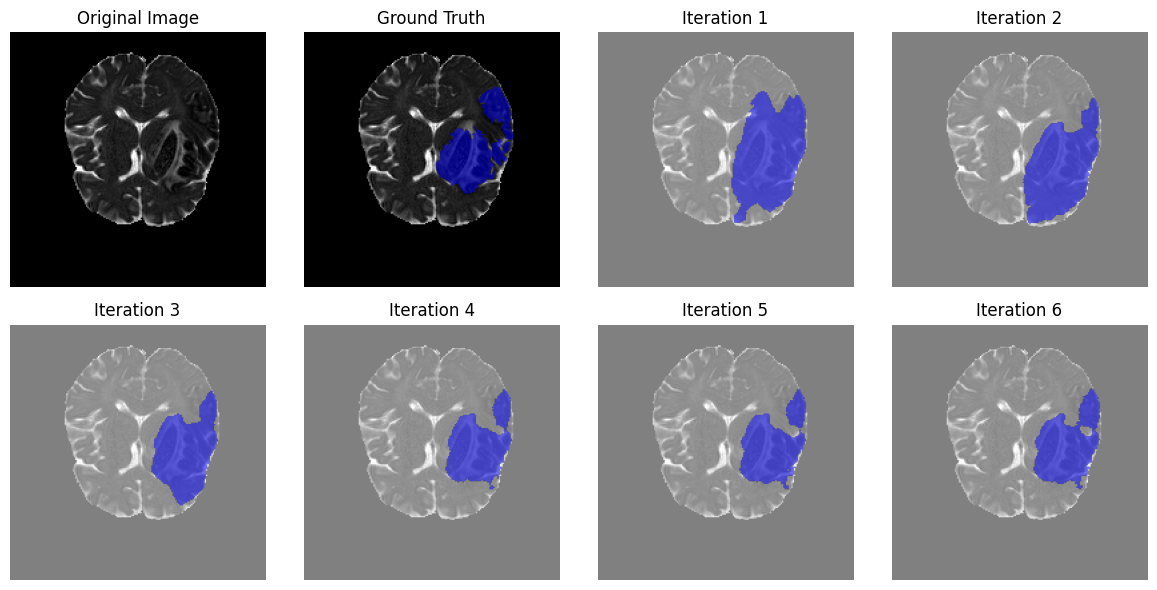

case: MR_heart-ACDC_ACDC_patient057_frame09_lvrv, dscs: [0.54739466 0.70052527 0.76145481 0.81901841 0.83047688 0.83638887]


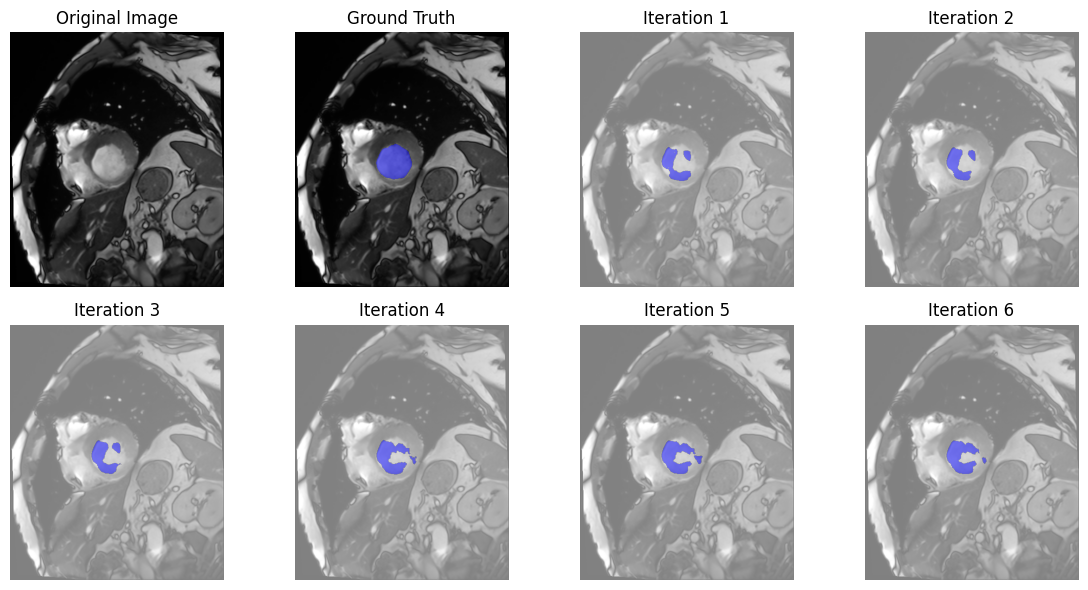

In [51]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import sys 
sys.path.append("..")
from medical_imagery_journals.helper_functions import display_evolution

#case_filename = "MR_WMH_FLAIR_Utrecht_9"#"CT_Aorta_AortaD6"


case_filenames = evalmetrics_df[evalmetrics_df['DSC_1'] > 0].nlargest(100, "dsc_progression_ratio")["CaseName"].values
case_filenames = np.random.choice(case_filenames, size=10, replace=False)  # Randomly select 10 cases
for case_filename in case_filenames:
    print(f"case: {case_filename}, dscs: {evalmetrics_df[dsc_columns][evalmetrics_df['CaseName'] == case_filename].values.flatten()}")
    """
    plt.figure(figsize=(6, 2))  # Width=6 inches, Height=0.4 inches ≈ 1cm
    plt.plot(range(1, 7), evalmetrics_df[dsc_columns][evalmetrics_df['CaseName'] == case_filename].values.flatten(), marker='o', label='DSC')
    plt.tight_layout()
    plt.show()
    """
    display_evolution(case_filename, img_dir, gts_dir, output_dir)

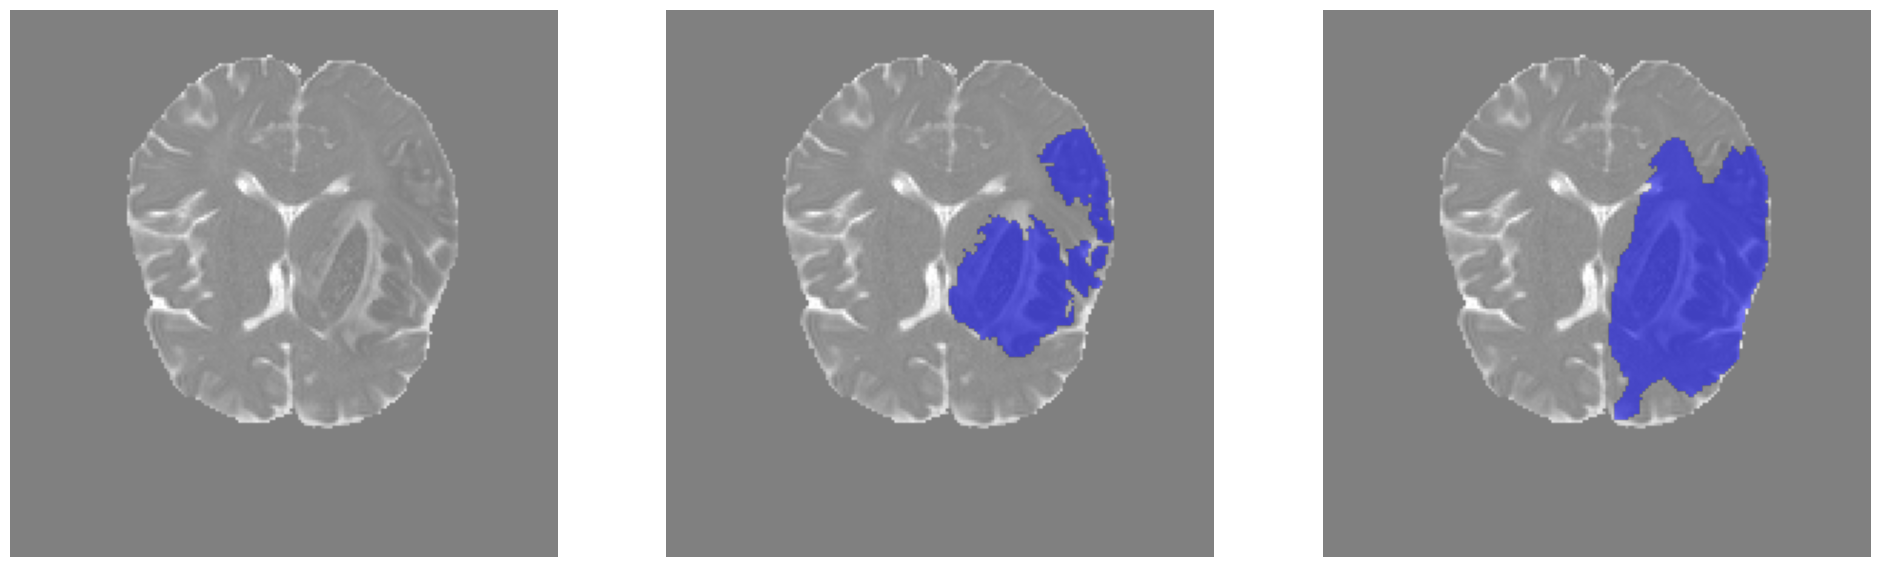

In [46]:

case_filename = "MR_ISLES2022_ADC_sub-strokecase0230"
import matplotlib.colors as colors

cmap = colors.ListedColormap(['none', 'blue'])
bounds = [0, 0.5, 1]
norm = colors.BoundaryNorm(bounds, cmap.N)

case_filename += ".npz"
img_filepath = os.path.join(img_dir, case_filename)
img_data = np.load(img_filepath)
img = img_data['imgs']
gt_filepath = os.path.join(gts_dir, case_filename)
gt_data = np.load(gt_filepath)
gt = gt_data["gts"]
# find largest class in gt
largest_class = np.argmax(np.bincount(gt.flatten()[gt.flatten() > 0]))
gt = (gt == largest_class).astype(np.float32)  # Convert to binary mask for the largest class
# find x slice where the segmentation is most visible
x_slice = np.argmax(np.sum(gt>0, axis=(1, 2)))

# Create subplot with 2 rows, 4 columns
fig, axes = plt.subplots(1, 3, figsize=(24, 8))
axes = axes.flatten()  # Flatten to make indexing easier

# Adjust spacing between subplots to be very minimal
#plt.subplots_adjust(wspace=0.02, hspace=0.1)

# First plot: original image
axes[0].imshow(img[x_slice,:,:], alpha=0.5, cmap='gray')
#axes[0].set_title('Original Image')
axes[0].axis('off')

# Second plot: ground truth overlay
axes[1].imshow(img[x_slice,:,:], alpha=0.5, cmap='gray')
axes[1].imshow(gt[x_slice,:,:], alpha=0.5,  cmap=cmap, norm=norm)
#axes[1].set_title('Ground Truth')
axes[1].axis('off')

# Load output data
output_filepath = os.path.join(output_dir, case_filename)
output_data = np.load(output_filepath)
seg = output_data['all_segs'][0]
seg = (seg == largest_class).astype(np.float32)  # Convert to binary mask for the largest class
axes[2].imshow(img[x_slice,:,:], alpha=0.5, cmap='gray')

axes[2].imshow(seg[x_slice], alpha=0.5,  cmap=cmap, norm=norm)
#axes[2].set_title(f'Iteration {1}')
axes[2].axis('off')

plt.show()


[-1.  0.  1.]


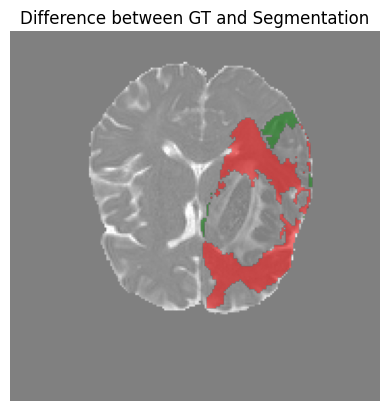

In [36]:
import matplotlib.colors as colors

# Create a custom colormap where 0 is transparent and 1 is green
cmap = colors.ListedColormap(['red', 'none', 'green'])
bounds = [-1.5, -0.5, 0.5, 1.5]
norm = colors.BoundaryNorm(bounds, cmap.N)

diff = gt - seg
print(np.unique(diff))
#diff[diff < 0] = 0  # Set negative values to 0 for visualization
plt.imshow(img[x_slice], alpha=0.5, cmap='gray')
plt.imshow(diff[x_slice], alpha=0.5,  cmap=cmap, norm=norm)
plt.title('Difference between GT and Segmentation')
plt.axis('off')
plt.show()

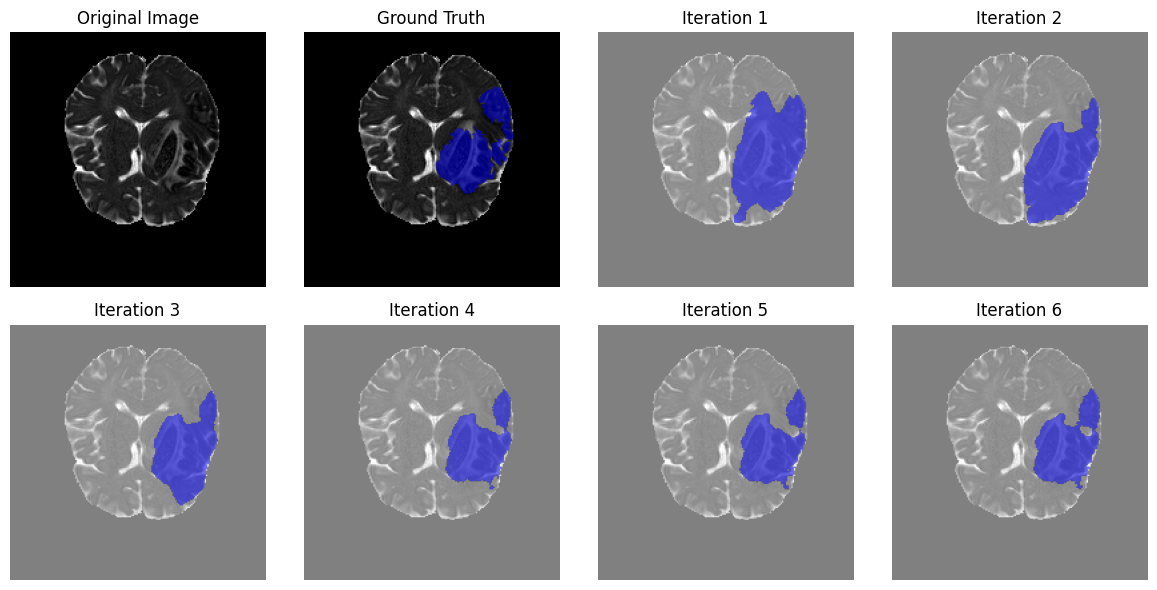

In [49]:
case_filename = "MR_ISLES2022_ADC_sub-strokecase0230"
display_evolution(case_filename, img_dir, gts_dir, output_dir)

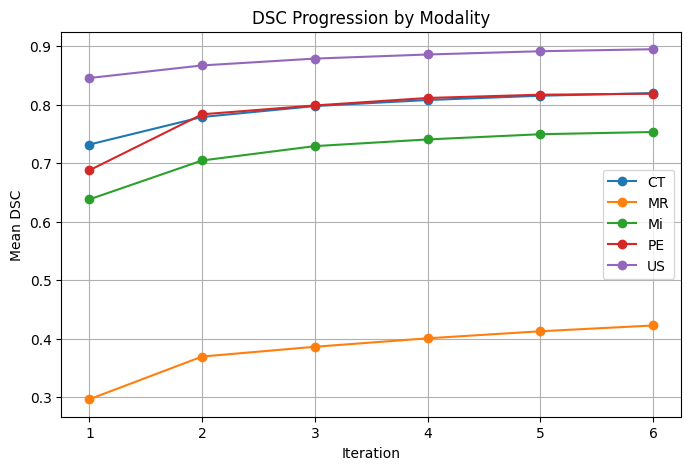

In [7]:
# Calculate mean DSC values for iterations 1-6 by modality
dsc_columns = ['DSC_1', 'DSC_2', 'DSC_3', 'DSC_4', 'DSC_5', 'DSC_6']

plt.figure(figsize=(8, 5))

for modality in evalmetrics_df['modality'].unique():
    subset = evalmetrics_df[evalmetrics_df['modality'] == modality]
    mean_dsc = [subset[col].mean() for col in dsc_columns]
    plt.plot(range(1, 7), mean_dsc, 'o-', label=modality)

plt.xlabel('Iteration')
plt.ylabel('Mean DSC')
plt.title('DSC Progression by Modality')
plt.legend()
plt.grid(True)
plt.show()

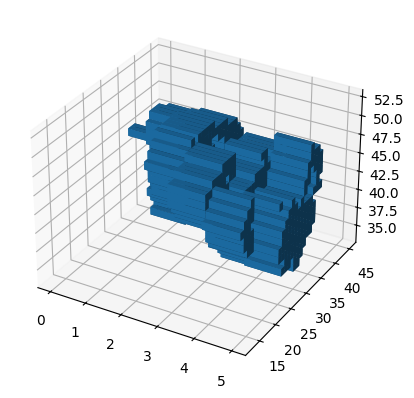

In [8]:
fig = plt.figure()
case_filename = "MR_ISLES2022_DWI_sub-strokecase0230"
factor = 3
ax = fig.add_subplot(111, projection='3d')
gt = np.load(os.path.join(gts_dir, case_filename+".npz"))['gts']
ax.voxels(gt[::factor, ::factor, ::factor])
plt.show()

In [9]:
case_filename = "MR_ISLES2022_DWI_sub-strokecase0230"  # Example case filename

img_dict = np.load(os.path.join(img_dir, case_filename+".npz"))
img, spacing = img_dict["imgs"], img_dict["spacing"]
gt = np.load(os.path.join(gts_dir, case_filename+".npz"))['gts']
print(f"img shape: {img.shape}, spacing: {spacing}, gt shape: {gt.shape}, unique gt values: {np.unique(gt)}")

segs = np.load(os.path.join(output_dir, case_filename) + ".npz")["all_segs"]


img shape: (15, 192, 192), spacing: [1.14583337 1.14583337 4.80000019], gt shape: (15, 192, 192), unique gt values: [0 1 2]


In [10]:
# save img as nifti
import nibabel as nib
#reverse img (x, y, z) to match the NIfTI format (z, y, x)
img = np.transpose(img, (2, 1, 0))  # Change from (x, y, z) to (z, y, x)
gt = np.transpose(gt, (2, 1, 0))  # Change from (x, y, z) to (z, y, x)
spacing_matrix = np.diag(spacing.tolist() + [1])  # Create a diagonal matrix with spacing and a 1 for the last dimension
img_nifti = nib.Nifti1Image(img, spacing_matrix)
gt_nifti = nib.Nifti1Image(gt, spacing_matrix)
nib.save(img_nifti, os.path.join(output_dir, "_niftis", case_filename + ".nii.gz"))
nib.save(gt_nifti, os.path.join(output_dir, "_niftis", case_filename + "_gt.nii.gz"))
for i, seg in enumerate(segs):
    seg = np.transpose(seg, (2, 1, 0))  # Change from (x, y, z) to (z, y, x)
    seg_nifti = nib.Nifti1Image(seg, spacing_matrix)
    nib.save(seg_nifti, os.path.join(output_dir, "_niftis", f"{case_filename}_seg_{i+1}.nii.gz"))